In [1]:
# result comparison between deployments, encounters

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# result_path  = '/home/ys587/__Data/__whistle/__whistle_30_species/__fit_result_species/__final'
result_path  = '/home/ubuntu/__whistle_30_species/__fit_result_species'

In [4]:
species_dict = {'BD': 0, 'CD': 1, 'STR': 2, 'SPT': 3, 'SPIN': 4, 'PLT': 5, 'RT': 6,  'FKW': 7}
num_species = len(species_dict)
species_list = list(species_dict.keys())
species_id = list(species_dict.values())

In [5]:
## result folders


In [6]:
# # run 0 
# deploy_split_folder = '20210520_155025_deployment_run0'
# encounter_split_folder = '20210520_104352_encounter_run0'
# clip_split_folder = '20210523_204759_clip_run0'

# run 1
# deploy_split_folder = '20210526_200926_deployment_run1'
# encounter_split_folder = '20210601_114359_encounter_run1'
# clip_split_folder = '20210528_125238_clip_run1'

# run 2
deploy_split_folder = '20210601_160023_deployment_run2'
encounter_split_folder = '20210604_113635_encounter_run2'
clip_split_folder = '20210603_015031_clip_run2'

# run temp
deploy_split_folder = '20210615_212312_deployment_run0'  # mixup & focal loss
# encounter_split_folder = '20210604_113635_encounter_run2'
# clip_split_folder = '20210603_015031_clip_run2'

# Deployment split

In [7]:
# deployment: e.g. STAR2006_test_results.npz
# deployment_list = ['STAR2000', 'STAR2003', 'STAR2006', 'HICEAS2002', 'PICEAS2005']
deployment_list = ['STAR2000']

# for ii in range(len(deployment_list)):
label_test_all  = []
label_pred_all = []
for ee in deployment_list:
    label_temp = np.load(os.path.join(result_path, deploy_split_folder, ee+'_test_results.npz'))
    label_test_all.append(label_temp['label_test'])
    label_pred_all.append(label_temp['label_pred'])
label_pred_all = np.concatenate(label_pred_all)
label_test_all = np.concatenate(label_test_all)

In [8]:
print(classification_report(label_test_all, np.argmax(label_pred_all, axis=1), target_names=species_list, digits=3)) #)  #, target_names=None, sample_weight=None2, output_dict=False, zero_division='warn')

              precision    recall  f1-score   support

          BD      0.032     0.414     0.059       128
          CD      0.744     0.231     0.353      3946
         STR      0.391     0.169     0.236      1188
         SPT      0.362     0.301     0.329       841
        SPIN      0.643     0.018     0.035       502
         PLT      0.012     0.862     0.024        29
          RT      0.175     0.417     0.247        72
         FKW      0.000     0.000     0.000         0

    accuracy                          0.221      6706
   macro avg      0.295     0.301     0.160      6706
weighted avg      0.603     0.221     0.297      6706



/home/ubuntu/anaconda3/envs/whistle_classifier/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/whistle_classifier/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/whistle_classifier/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

## Confusion matrix

In [9]:
np.set_printoptions(linewidth=200, precision=2, suppress=True)

In [15]:
# cm = confusion_matrix(label_train[:label_train_pred.shape[0]], np.argmax(label_train_pred, axis=1), labels=species_id)
cm = confusion_matrix(label_test_all, np.argmax(label_pred_all, axis=1), labels=species_id)

In [11]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_list)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=species_list)

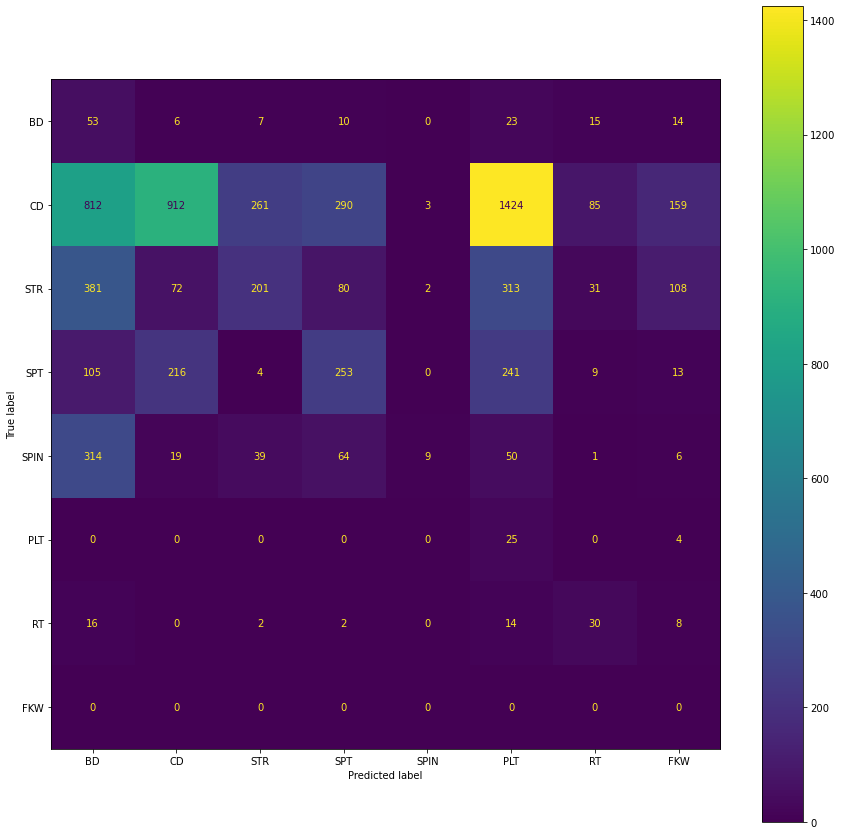

In [12]:
fig, ax = plt.subplots(figsize=[15, 15])
disp.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format=None, colorbar=True)


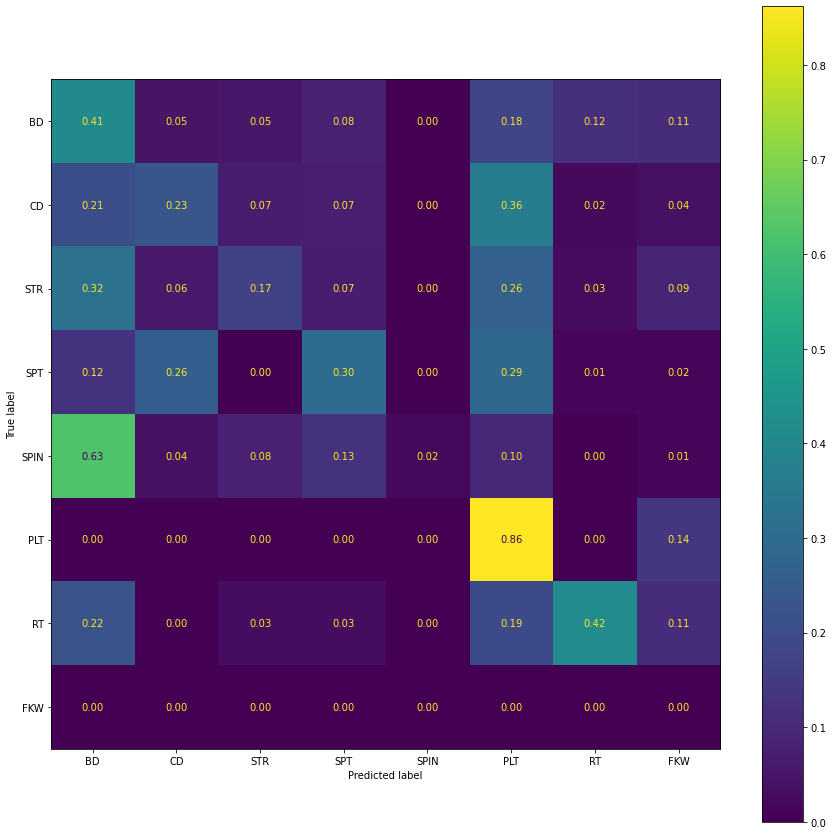

In [13]:
fig, ax = plt.subplots(figsize=[15, 15])
disp2.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format='.2f', colorbar=True)

In [16]:
# deployment: e.g. STAR2006_test_results.npz
# deployment_list = ['STAR2000', 'STAR2003', 'STAR2006', 'HICEAS2002', 'PICEAS2005']
deployment_list = ['STAR2003']

# for ii in range(len(deployment_list)):
label_test_all  = []
label_pred_all = []
for ee in deployment_list:
    label_temp = np.load(os.path.join(result_path, deploy_split_folder, ee+'_test_results.npz'))
    label_test_all.append(label_temp['label_test'])
    label_pred_all.append(label_temp['label_pred'])
label_pred_all = np.concatenate(label_pred_all)
label_test_all = np.concatenate(label_test_all)

In [17]:
print(classification_report(label_test_all, np.argmax(label_pred_all, axis=1), target_names=species_list, digits=3)) #)  #, target_names=None, sample_weight=None2, output_dict=False, zero_division='warn')

              precision    recall  f1-score   support

          BD      0.647     0.082     0.146       268
          CD      0.858     0.300     0.444       744
         STR      0.049     0.328     0.086        64
         SPT      0.479     0.130     0.204       439
        SPIN      0.100     0.055     0.071        55
         PLT      0.000     0.000     0.000         0
          RT      0.000     0.000     0.000         0
         FKW      0.826     0.717     0.768       311

    accuracy                          0.292      1881
   macro avg      0.370     0.201     0.215      1881
weighted avg      0.684     0.292     0.376      1881



/home/ubuntu/anaconda3/envs/whistle_classifier/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/whistle_classifier/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/whistle_classifier/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

## Confusion matrix

In [18]:
np.set_printoptions(linewidth=200, precision=2, suppress=True)

In [19]:
# cm = confusion_matrix(label_train[:label_train_pred.shape[0]], np.argmax(label_train_pred, axis=1), labels=species_id)
cm = confusion_matrix(label_test_all, np.argmax(label_pred_all, axis=1), labels=species_id)

In [20]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_list)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=species_list)

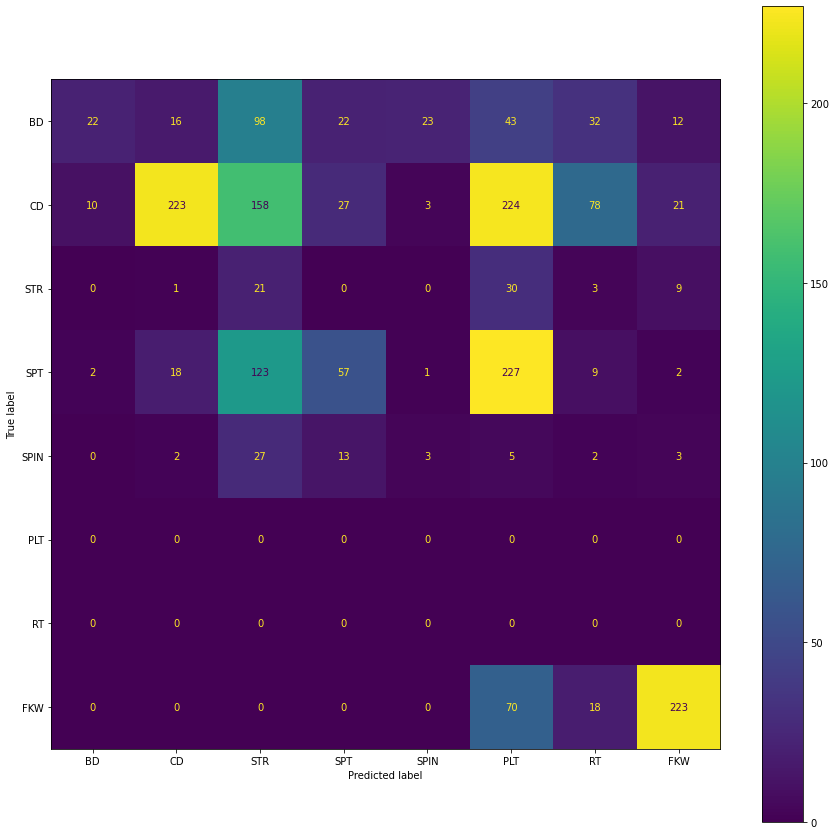

In [21]:
fig, ax = plt.subplots(figsize=[15, 15])
disp.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format=None, colorbar=True)


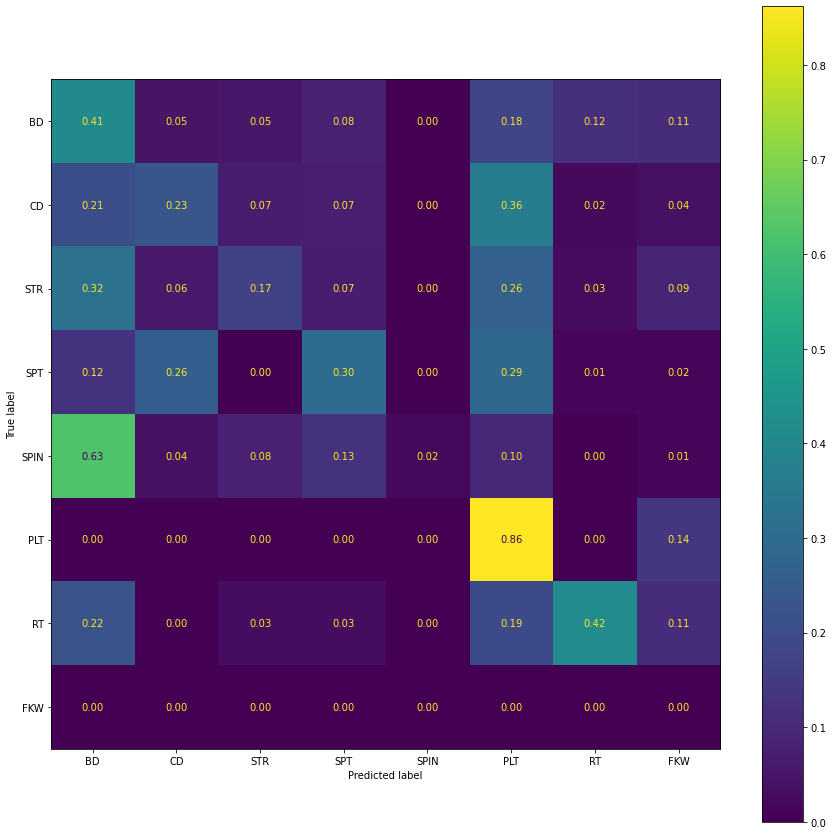

In [22]:
fig, ax = plt.subplots(figsize=[15, 15])
disp2.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format='.2f', colorbar=True)